# **Trabajo Practico Numero 1**

**Antes que nada**:</br> $para$ $los$ $ejercicios$ $seran$ $necesarias$ $las$ $librerias$ **numpy**, **scipy** $y$ **matplotlib**, </br>$por$ $lo$ $tanto$, $las$ $importamos$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Ejercicio 1

Dada una matriz A $\in\mathbb{R}^{n \times n}$, devuelve las dos matrices L y U de la descomposición A = LU.

In [2]:
def descompLU(A):
    '''
    Parametro: matriz A perteneciente a R^n*n.
    Retorna: Las dos matrices de descomposicion LU = A
    '''
    A = A.astype(np.float64)

    n = A.shape[0] 

    if not np.diag(A).all():
        print('Error: Hay por lo menos un cero en la diagonal')
        identidad = np.eye(n)
        return (identidad,A)

    if n == 1:
        L = 1
        U = A[0,0]
        return (L, U)

    U = np.zeros_like(A)
    U[0,:] = A[0,:]  # Primer fila de U es igual a primer fila de A

    L = np.eye(n)
    L[1:, 0] = A[1:,0] / U[0,0] #L_21

    matriz_recursiva = A[1:,1:] - L[1:, 0].reshape(n-1,1)@U[0,1:].reshape(1,n-1)

    L_22, U_22 = descompLU(matriz_recursiva)
    L[1:,1:] = L_22 
    U[1:,1:] = U_22 
    
    return (L,U)

In [3]:
# Ejemplo de uso
A = np.array([[4, 3, 2, 1],
              [2, 9, 7, 5],
              [4, 7, 7, 8],
              [6, 9, 8, 9]])


L, U = descompLU(A)
print("Matriz L:")
print(L)
print("\nMatriz U:")
print(U)

print("\nMatriz L*U:\n", np.dot(L,U))

Matriz L:
[[1.         0.         0.         0.        ]
 [0.5        1.         0.         0.        ]
 [1.         0.53333333 1.         0.        ]
 [1.5        0.6        0.77777778 1.        ]]

Matriz U:
[[4.         3.         2.         1.        ]
 [0.         7.5        6.         4.5       ]
 [0.         0.         1.8        4.6       ]
 [0.         0.         0.         1.22222222]]

Matriz L*U:
 [[4. 3. 2. 1.]
 [2. 9. 7. 5.]
 [4. 7. 7. 8.]
 [6. 9. 8. 9.]]


## Ejercicio 3

In [4]:
def resolverLU(A, b):
    '''
    Parametros:
        *matriz A n*n
        *vector b de n elementos
    Retorna:
        *x vector solucion de la ecuación Ax = b
    '''

    #Obtenemos L y U haciendo uso del ejercicio 1
    L, U = descompLU(A)

    #Resuelvo la ecuacion Ly = b especificada en la consigna
    y = sp.linalg.solve_triangular(L, b, lower=True)

    #Con (y) puedo obtener la solucion a la ecuación Ux = y
    x = sp.linalg.solve_triangular(U, y, lower=False)

    return x


In [5]:
# Ejemplo de uso
A = np.array([[4, 3, 2, 1],
              [2, 9, 7, 5],
              [4, 7, 7, 8],
              [6, 9, 8, 9]])

b = np.array([4,4,7,8])

x = resolverLU(A, b)
print(f'\nResultado:\n {A@x}')


Resultado:
 [4. 4. 7. 8.]


## Ejercicio 5

In [6]:
def inversa(A):
    L = descompLU(A)[0]
    U = descompLU(A)[1]
    #Matriz identidad del tamaño de A.
    I= np.eye(len(A))
    i=0
    #Creamos una matriz Ainversa de 0s del mismo tamaño que A.
    Ainversa = np.zeros((len(A),len(A[0])))
    #Cada fila de Ainversa es igual a Aei.
    while i < len(I):
        #Resolvemos Ly=ei
        y = sp.linalg.solve_triangular(L,I[i], lower=True)
        #Resolvemos Ux=y
        x = sp.linalg.solve_triangular(U,y, lower=False)
        Ainversa[i] = x
        i = i+1
    #Devuelve la trnaspuesta de Ainversa (para que Aei sea cada columna).
    return(np.transpose(Ainversa))
        


## Ejercicio 6

In [7]:
# Obtengo una matriz generada aleatoriamente
Al = np.random.rand(10,10)

# Obtengo la matriz inversa usando la funcion del Ej. 5
inv_Al = inversa(Al)

# Obtengo el producto entre ambas matrices obtenidas
producto = np.dot(inv_Al, Al)

# Calculo el error en norma Frobenius
diferencia = producto - np.eye(len(producto)) #Obtengo la matriz para calcularle la norma Frobenius

# Calculo el radicando: sumo los cuadrados de la diagonal de la matriz diferencia
radicando = 0
for i in range (len(diferencia)):
    radicando = radicando + diferencia[i,i]**2

# Finalmente obtengo la raiz del radicando, obteniendo así el error
error_frobenius = np.sqrt(radicando)

error_frobenius

3.461047940404909e-14

## Ejercicio 7

In [8]:
def error_relativo_b (A,x,b):
    e = np.linalg.norm(A@x-b, ord=2)/np.linalg.norm(b, ord=2)
    return(np.log(e))

def error_relativo_x (xn,x):
    e = np.linalg.norm(xn-x, ord=2)/np.linalg.norm(x, ord=2)
    return(np.log(e))

In [9]:
def generar_random(n, matrix=True):
    '''
    n: Numero entero
    matrix: Booleano, en caso de ser True la funcion devuelve una matriz de n*n
            con numeros aleatorios pertenecientes a [-1,1).
            En caso de ser False, la funcion devuelve un vector de n elementos,
            todos pertenecientes a [-1,1). Valor por defecto = True
    '''

    if matrix:
        # Genero matriz aleatoria de 200*200
        A_positiva = np.random.rand(n,n)
        # Matriz de tamaño nxn de números aleatorios en [-1,0)
        A_negativa = np.random.rand(n,n) - np.ones((n,n))
        # Matriz de tamaño nxn de números aleatorios en [-1,1)
        return A_positiva + A_negativa
        
    else:
        # Genero vector aleatorio
        x_positivo = np.random.rand(n)
        x_negativo = np.random.rand(n) - np.ones(n)
        return x_positivo + x_negativo

In [14]:
def error_matriz_i(i, ej_8 = False, ej_9 = False):
    '''
    Parametro: i: Numero entero 
    Retorna: Tupla conteniendo el error relativo de la solucion al sistema Ax = b (generado aleatoriamente)
             , al resolverlo de dos maneras distintas.
             Siendo A una matriz cuadrada en reales con i filas, y b un vector en reales con i elementos
            
    '''
    ln_error_relativo_x1 = 0
    ln_error_relativo_x2 = 0

    for n in range(10):

        A = generar_random(i)

        x = generar_random(i, matrix=False)

        # Defino b
        b = np.dot(A,x)

        if ej_9:
            x1 = np.linalg.solve(A,b)
            x2 = np.linalg.inv(A)@b
        else:
            # Calculo la solucion al sistema Ax = b usando la funcion del Ejercicio 3
            x1 = resolverLU(A,b)

            # Calculo x2 = inv(A)b
            x2 = np.dot(inversa(A),b)

        if ej_8: # Caso en el que busco el error relativo en el valor de x (Ejercicio 8)
            # Obtengo el error relativo
            ln_error_relativo_x1 = ln_error_relativo_x1 + error_relativo_x(x1,x)
            # Obtengo el error relativo
            ln_error_relativo_x2 = ln_error_relativo_x2 + error_relativo_x(x2,x)      
        else: # Caso en el que busco el error relativo en el valor de b (Ejercicio 7)
            # Obtengo el error relativo
            ln_error_relativo_x1 = ln_error_relativo_x1 + error_relativo_b(A,x1,b)
            # Obtengo el error relativo
            ln_error_relativo_x2 = ln_error_relativo_x2 + error_relativo_b(A,x2,b)

    # Devuelvo una tupla conteniendo ambos errores relativos
    return (ln_error_relativo_x1,ln_error_relativo_x2)


In [13]:
def obtener_vectores(ej_8 = False, ej_9 = False):
    # Inicializo dos listas vacias para luego llenarlas con los elementos de los vectores finaless
    vector1, vector2 = [], []

    for i in range(10,201):

        # Obtengo la suma de los logaritmos de los errores relativos
        sumar1, sumar2 = error_matriz_i(i,ej_8, ej_9)         

        # Agrego los errores relativos en las listas correspondientes
        vector1.append(sumar1) 
        vector2.append(sumar2)

    # Creo los vectores con los elementos de las listas
    v1 = np.array(vector1)
    v2 = np.array(vector2)

    return (v1,v2)


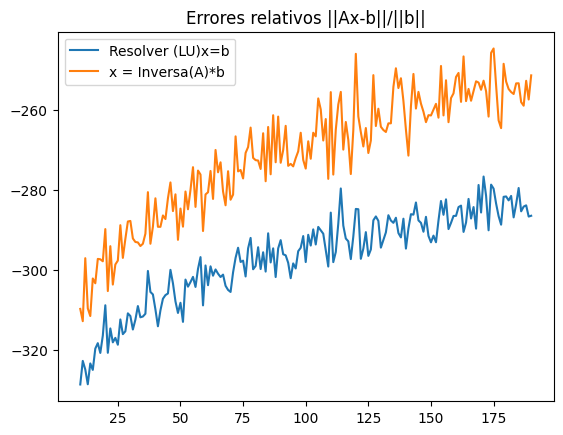

In [16]:
v1, v2 = obtener_vectores()

n = np.arange(10,len(v1))
plt.plot(n,v1[10:], label='Resolver (LU)x=b')
plt.plot(n,v2[10:], label='x = Inversa(A)*b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.legend()
plt.show()

## Ejercicio 8

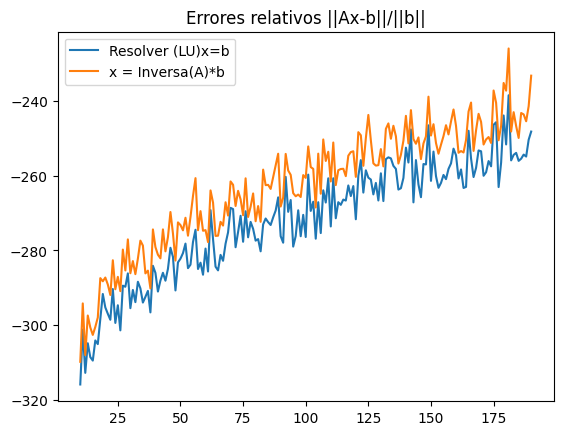

In [12]:
v1, v2 = obtener_vectores(ej_8=True)

n = np.arange(10,len(v1))
plt.plot(n,v1[10:], label='Resolver (LU)x=b')
plt.plot(n,v2[10:], label='x = Inversa(A)*b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.legend()
plt.show()

## Ejercicio 9

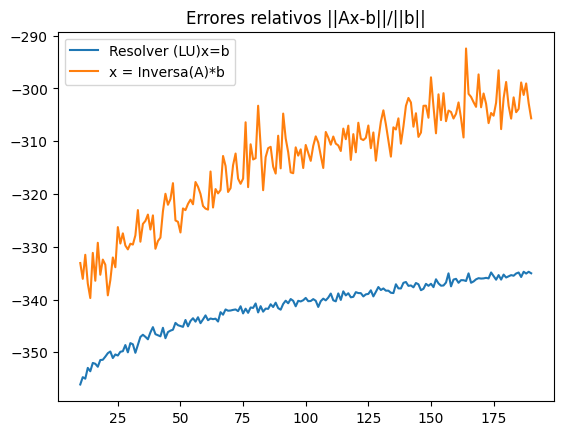

In [15]:
v1, v2 = obtener_vectores(ej_9=True)

n = np.arange(10,len(v1))
plt.plot(n,v1[10:], label='Resolver (LU)x=b')
plt.plot(n,v2[10:], label='x = Inversa(A)*b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.legend()
plt.show()

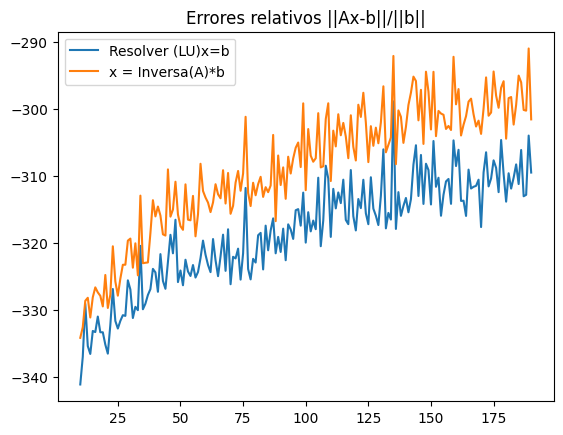

In [17]:
v1, v2 = obtener_vectores(ej_8=True, ej_9=True)

n = np.arange(10,len(v1))
plt.plot(n,v1[10:], label='Resolver (LU)x=b')
plt.plot(n,v2[10:], label='x = Inversa(A)*b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.legend()
plt.show()

## Ejercicio 10

**Primero** armo la matriz A que respete la especificación del ejercicio

In [30]:
A_ij = np.zeros(shape=(20,20))

for i in range(20):
    for j in range(20):
        A_ij[i,j] = 1/(1+i+j)

In [31]:
v1, v2 = [], []
condicionales = []

for n in range(2,21):
    a_ij = A_ij[:n,:n]

    error_relativo_1 = 0
    error_relativo_2 = 0

    for m in range(10):
        # Defino b para tener un sistema a resolver
        b = np.random.rand(n)

        # Obtengo las soluciones del sistema por dos metodos distintos
        x1 = resolverLU(a_ij,b)
        x2 = np.dot(inversa(a_ij),b)

        error_relativo_1 = error_relativo_1 + error_relativo_b(a_ij,x1,b)
        error_relativo_2 = error_relativo_1 + error_relativo_b(a_ij,x2,b)
    
    v1.append(error_relativo_1)
    v2.append(error_relativo_2)

    # Calculo y guardo el condicional de a_ij para usarlo como referencia
    cond_a_ij = np.linalg.cond(a_ij, p=2)
    condicionales.append(cond_a_ij)

print(f'vector 1:\n{v1}\nvector 2:\n{v2}')    

C:\Users\guido\AppData\Local\Temp\ipykernel_17452\1178939439.py:3: RuntimeWarning: divide by zero encountered in log
  return(np.log(e))


vector 1:
[-inf, -337.9946395568874, -304.36261776307197, -274.817672923401, -244.17714144120538, -208.37304878024142, -173.7775987674689, -145.3075005803694, -108.23986054794446, -81.93915904452192, -33.37050723023478, -12.10945966114732, 1.0122625814565467, -10.495826620764062, 9.862459303036799, 6.638286739840552, 15.011844775859565, 6.761301563655228, 9.16544156278101]
vector 2:
[-inf, -370.11445827311934, -334.89340089289067, -301.0107913450132, -266.931516763925, -228.58423431035237, -189.59839712787056, -159.4718984896736, -117.02113901992485, -88.95067383038406, -35.8917745578656, -13.145387526950788, 2.7123006107089394, -10.238780560433565, 10.798899451187845, 7.932754264784905, 17.55125795338714, 7.763889118726432, 10.551212429059545]


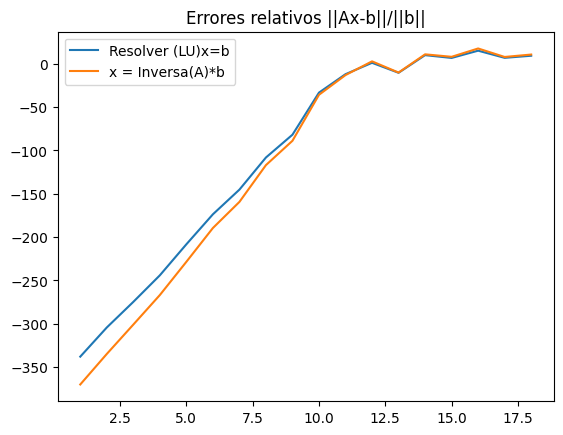

In [46]:
n = np.arange(len(v1))
plt.plot(n,v1[:], label='Resolver (LU)x=b')
plt.plot(n,v2[:], label='x = Inversa(A)*b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.legend()
plt.show()

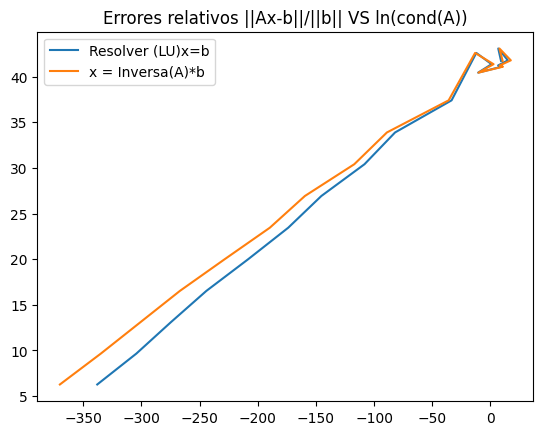

In [52]:
plt.clf()
plt.plot(v1[:],np.log(condicionales), label='Resolver (LU)x=b')
plt.plot(v2[:],np.log(condicionales), label='x = Inversa(A)*b')
plt.title('Errores relativos ||Ax-b||/||b|| VS ln(cond(A))')
plt.legend()
plt.show()